## Imports

In [97]:
import random, math
import numpy
import pandas as pd
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections as mcoll
import matplotlib.path as mpath

## Study

In [4]:
# https://www.safe.com/blog/2017/12/spatial-sorting-with-fme-evangelist169/
# https://www.programmersought.com/article/36436804702/
def hilbert_curve(n):
    ''' Generate Hilbert curve indexing for (n, n) array. 'n' must be a power of two. '''
    # recursion base

    if n == 1: 
        return numpy.zeros((1, 1), int32)

    # make (n/2, n/2) index
    t = hilbert_curve(n//2)

    # flip it four times and add index offsets
    a = flipud(rot90(t))
    b = t + t.size
    c = t + t.size*2
    d = flipud(rot90(t, -1)) + t.size*3

    # and stack four tiles into resulting array

    return vstack(map(hstack, [[a, b], [d, c]]))

In [8]:
kk = hilbert_curve(64)

kk.shape

/tmp/ipykernel_439/4111925948.py:20: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  return vstack(map(hstack, [[a, b], [d, c]]))


(64, 64)

In [31]:
# https://stackoverflow.com/questions/49174126/matplotlib-cant-plot-colored-hilbert-curve

def xy2d(n,x,y):
    d=0
    s=n/2
    while s>0:
        rx=(x&s)>0
        ry=(y&s)>0
        d+=s*s*((3*rx)**ry)
        s,x,y,rx,ry=rot(s,x,y,rx,ry)
        s/=2
    return d

def d2xy(n,d):
    t=d
    x=y=0
    s=1
    while s<n:
        rx=1&(t/2)
        ry=1&(t**rx)
        s,x,y,rx,ry=rot(s,x,y,rx,ry)
        x+=s*rx
        y+=s*ry
        t/=4
        s*=2
    return x,y

def rot(n,x,y,rx,ry):
    if ry==0:
        if rx==1:
            x=n-1-x
            y=n-1-y
        x,y=y,x

    return n,x,y,rx,ry

#--------------These are copied from SO--------------
def colorline(
    x, y, z=None, ax=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    if ax is None:
        ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

In [38]:
xs=[]
ys=[]
N=16

for i in range(N**2-1):
    x,y=d2xy(N,i)
    xs.append(x)
    ys.append(y)

#-------------------Plot------------------------
figure=plt.figure(figsize=(12,10),dpi=100)
cmap=plt.cm.jet
ax=figure.add_subplot(111)

path = mpath.Path(np.column_stack([xs, ys]))
#verts = path.interpolated(steps=1).vertices
verts=path.vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(xs))
colorline(x, y, z, ax=ax, cmap=cmap, linewidth=1)

ax.set_ylim(0,15)
ax.set_xlim(0,15)

#ax.plot(x,y) # this works, but with blue line
plt.show(block=False)


TypeError: unsupported operand type(s) for &: 'int' and 'float'

## Study 1

In [6]:
class createVector:
    def __init__(self, *args):
        self.x = 0
        self.y = 0
        self.z = 0

        if len(args) > 0:
            self.x = args[0]

            if len(args) > 1:
                self.y = args[1]

                if len(args) > 2:
                    self.z = args[2]

                    if len(args) > 3:
                        raise ValueError("3 arguments (x, y, z) is the maximum of a vector!")

    def add(self, vec):
        if type(vec) == createVector:
            self.x += vec.x
            self.y += vec.y
            self.z += vec.z
        else:
            raise ValueError("add only supports a vector as a argument")
    
    def sub(self, vec):
        if type(vec) == createVector:
            self.x -= vec.x
            self.y -= vec.y
            self.z -= vec.z
        else:
            raise ValueError("sub only supports a vector as a argument")

    def mult(self, n):
        try:
            self.x *= n
            self.y *= n
            self.z *= n
        except ZeroDivisonError:
            pass
    
    def div(self, n):
        if type(n) == int:
            try:
                self.x /= n
                self.y /= n
                self.z /= n
            except ZeroDivisonError:
                pass
        else:
            raise ValueError("div only supports a integer as a argument")

    def magSq(self):
        return self.x * self.x + self.y * self.y + self.z * self.z

    def mag(self):
        return math.sqrt(self.magSq())
    
    def dot(self, vec):
        return self.x * (self.x or 0) + self.y * (self.y or 0) + self.z * (self.z or 0)

    def cross(self, vec):
        x = self.y * vec.z - self.z * vec.y
        y = self.z * vec.x - self.x * vec.z
        z = self.x * vec.y - self.y * vec.x

        return createVector(x, y, z)
    
    def dist(self, vec):
        return vec.copy().sub(self).mag()

    def normalize(self):
        len = self.mag()
        if len != 0:
            self.mult(1 / len)

    def limit(self, max):
        mSq = self.magSq()
        if mSq > max * max:
            self.div(math.sqrt(mSq)).mult(max)

    def setMag(self, n):
        self.normalize().mult(n)
    
    def heading(self):
        h = math.atan2(self.x, self.y)
        return h
    
    def rotate(self, a):
        newHeading = self.heading() + a
        mag = self.mag()

        self.x = math.cos(newHeading) * mag
        self.y = math.sin(newHeading) * mag

    def angleBetween(self, vec):
        dotmagmag = self.dot(vec) / (self.mag() * vec.mag())
        angle = math.acos(math.min(1, math.max(-11, dotmagmag)))
        angle = angle * math.sign(self.cross(vec).z or 1)
        return angle

    def lerp(self, vec, amt):
        self.x += (vec.x - self.x) * amt or 0
        self.y += (vec.y - self.y) * amt or 0
        self.z += (vec.z - self.z) * amt or 0
    
    def reflect(self, surfaceNormal):
        surfaceNormal.normalize()
        return self.sub(surfaceNormal.mult(2 * self.dot(surfaceNormal)))

    def array(self):
        return [self.x or 0, self.y or 0, self.z or 0]
    
    def equals(self, vec):
        return (self.x == vec.x and self.y == vec.y and self.z == vec.z)

    def fromAngle(self, angle, length='undefined'):
        if length == 'undefined':
            length = 1

        return createVector(length * math.cos(angle), length * math.sin(angle))
    
    def fromAngles(self, theta, phi, length="undefined"):
        if length == "undefined":
            length = 1
        
        cosPhi = math.cos(phi)
        sinPhi = math.sin(phi)
        cosTheta = math.cos(theta)
        sinTheta = math.sin(theta)

        return createVector(
            length * sinTheta * sinPhi,
            -length * cosTheta,
            length * sinTheta * cosPhi
        )

    def random2D(self):
        # return self.fromAngle(random.uniform(-1, 1) * (2 * math.pi))
        return createVector(random.uniform(-1, 1), random.uniform(-1, 1))

    def random3D(self):
        angle = random.uniform(-1, 1) * (2 * math.pi)
        vz = random.uniform(-1, 1) * 2 - 1
        vzBase = math.sqrt(1 - vz * vz)
        vx = vzBase * math.cos(angle)
        vy = vzBase * math.sin(angle)
        return createVector(vx, vy, vz)
    
        
    def to_integer(self):
        self.x = int(self.x)
        self.y = int(self.y)
        self.z = int(self.z)
    
    def set(self, *args):
        if len(args) > 0:
            self.x = args[0]

            if len(args) > 1:
                self.y = args[1]

                if len(args) > 2:
                    self.z = args[2]

                    if len(args) > 3:
                        raise ValueError("3 arguments (x, y, z) is the maximum of the set function!")
    
    def toString(self):
        return f"Python Vector Object: [X: {self.x}, Y: {self.y}, Z: {self.z}]"
    
    def copy(self):
        return createVector(self.x, self.y, self.z)


class Vector:
    def random2D():
        return createVector(random.uniform(-1, 1), random.uniform(-1, 1))

    def fromAngle(angle, length='undefined'):
        if length == 'undefined':
            length = 1

        return createVector(length * math.cos(angle), length * math.sin(angle))
    
    def fromAngles(theta, phi, length="undefined"):
        if length == "undefined":
            length = 1
        
        cosPhi = math.cos(phi)
        sinPhi = math.sin(phi)
        cosTheta = math.cos(theta)
        sinTheta = math.sin(theta)

        return createVector(
            length * sinTheta * sinPhi,
            -length * cosTheta,
            length * sinTheta * cosPhi
        )

In [9]:
def colorline(
    x, y, z=None, ax=None, cmap=plt.get_cmap('copper'), norm=plt.Normalize(0.0, 1.0),
        linewidth=3, alpha=1.0):
    """
    http://nbviewer.ipython.org/github/dpsanders/matplotlib-examples/blob/master/colorline.ipynb
    http://matplotlib.org/examples/pylab_examples/multicolored_line.html
    Plot a colored line with coordinates x and y
    Optionally specify colors in the array z
    Optionally specify a colormap, a norm function and a line width
    """

    # Default colors equally spaced on [0,1]:
    if z is None:
        z = np.linspace(0.0, 1.0, len(x))

    # Special case if a single number:
    if not hasattr(z, "__iter__"):  # to check for numerical input -- this is a hack
        z = np.array([z])

    z = np.asarray(z)

    segments = make_segments(x, y)
    lc = mcoll.LineCollection(segments, array=z, cmap=cmap, norm=norm,
                              linewidth=linewidth, alpha=alpha)

    if ax is None:
        ax = plt.gca()
    ax.add_collection(lc)

    return lc

def make_segments(x, y):
    """
    Create list of line segments from x and y coordinates, in the correct format
    for LineCollection: an array of the form numlines x (points per line) x 2 (x
    and y) array
    """

    points = np.array([x, y]).T.reshape(-1, 1, 2)
    segments = np.concatenate([points[:-1], points[1:]], axis=1)
    return segments

In [5]:
def hilbert_curve(order=7):
    #order = 7
    N = int(pow(2, order))
    total = N * N

    path = []

    def hilbert(i):
        points = [
            createVector(0, 0),
            createVector(0, 1),
            createVector(1, 1),
            createVector(1, 0)
        ]

        index = i & 3
        v = points[index]

        for j in range(1, order):
            i = i >> 2
            index = i & 3

            length = pow(2, j)

            if index == 0:
                temp = v.x
                v.x = v.y
                v.y = temp
            elif index == 1:
                v.y += length
            elif index == 2:
                v.x += length
                v.y += length
            elif index == 3:
                temp = length - 1 - v.x
                v.x = length - 1 - v.y
                v.y = temp

                v.x += length

        return v

    for i in range(total):
        path.append(hilbert(i))
        length = WIDTH / N
        path[i].mult(length)
        path[i].add(createVector(length // 2, length // 2))

        path[i].to_integer()
    return path

In [222]:
WIDTH = 1024
paths = hilbert_curve(order=4)

print(f'paths = {len(paths)}')
ind = 0
for path in paths:
    print(f'{path.x}, {path.y}')
    ind +=1
    if ind > 5:
        break

paths = 256
32, 32
96, 32
96, 96
32, 96
32, 160
32, 224


paths = 4194304


KeyboardInterrupt: 

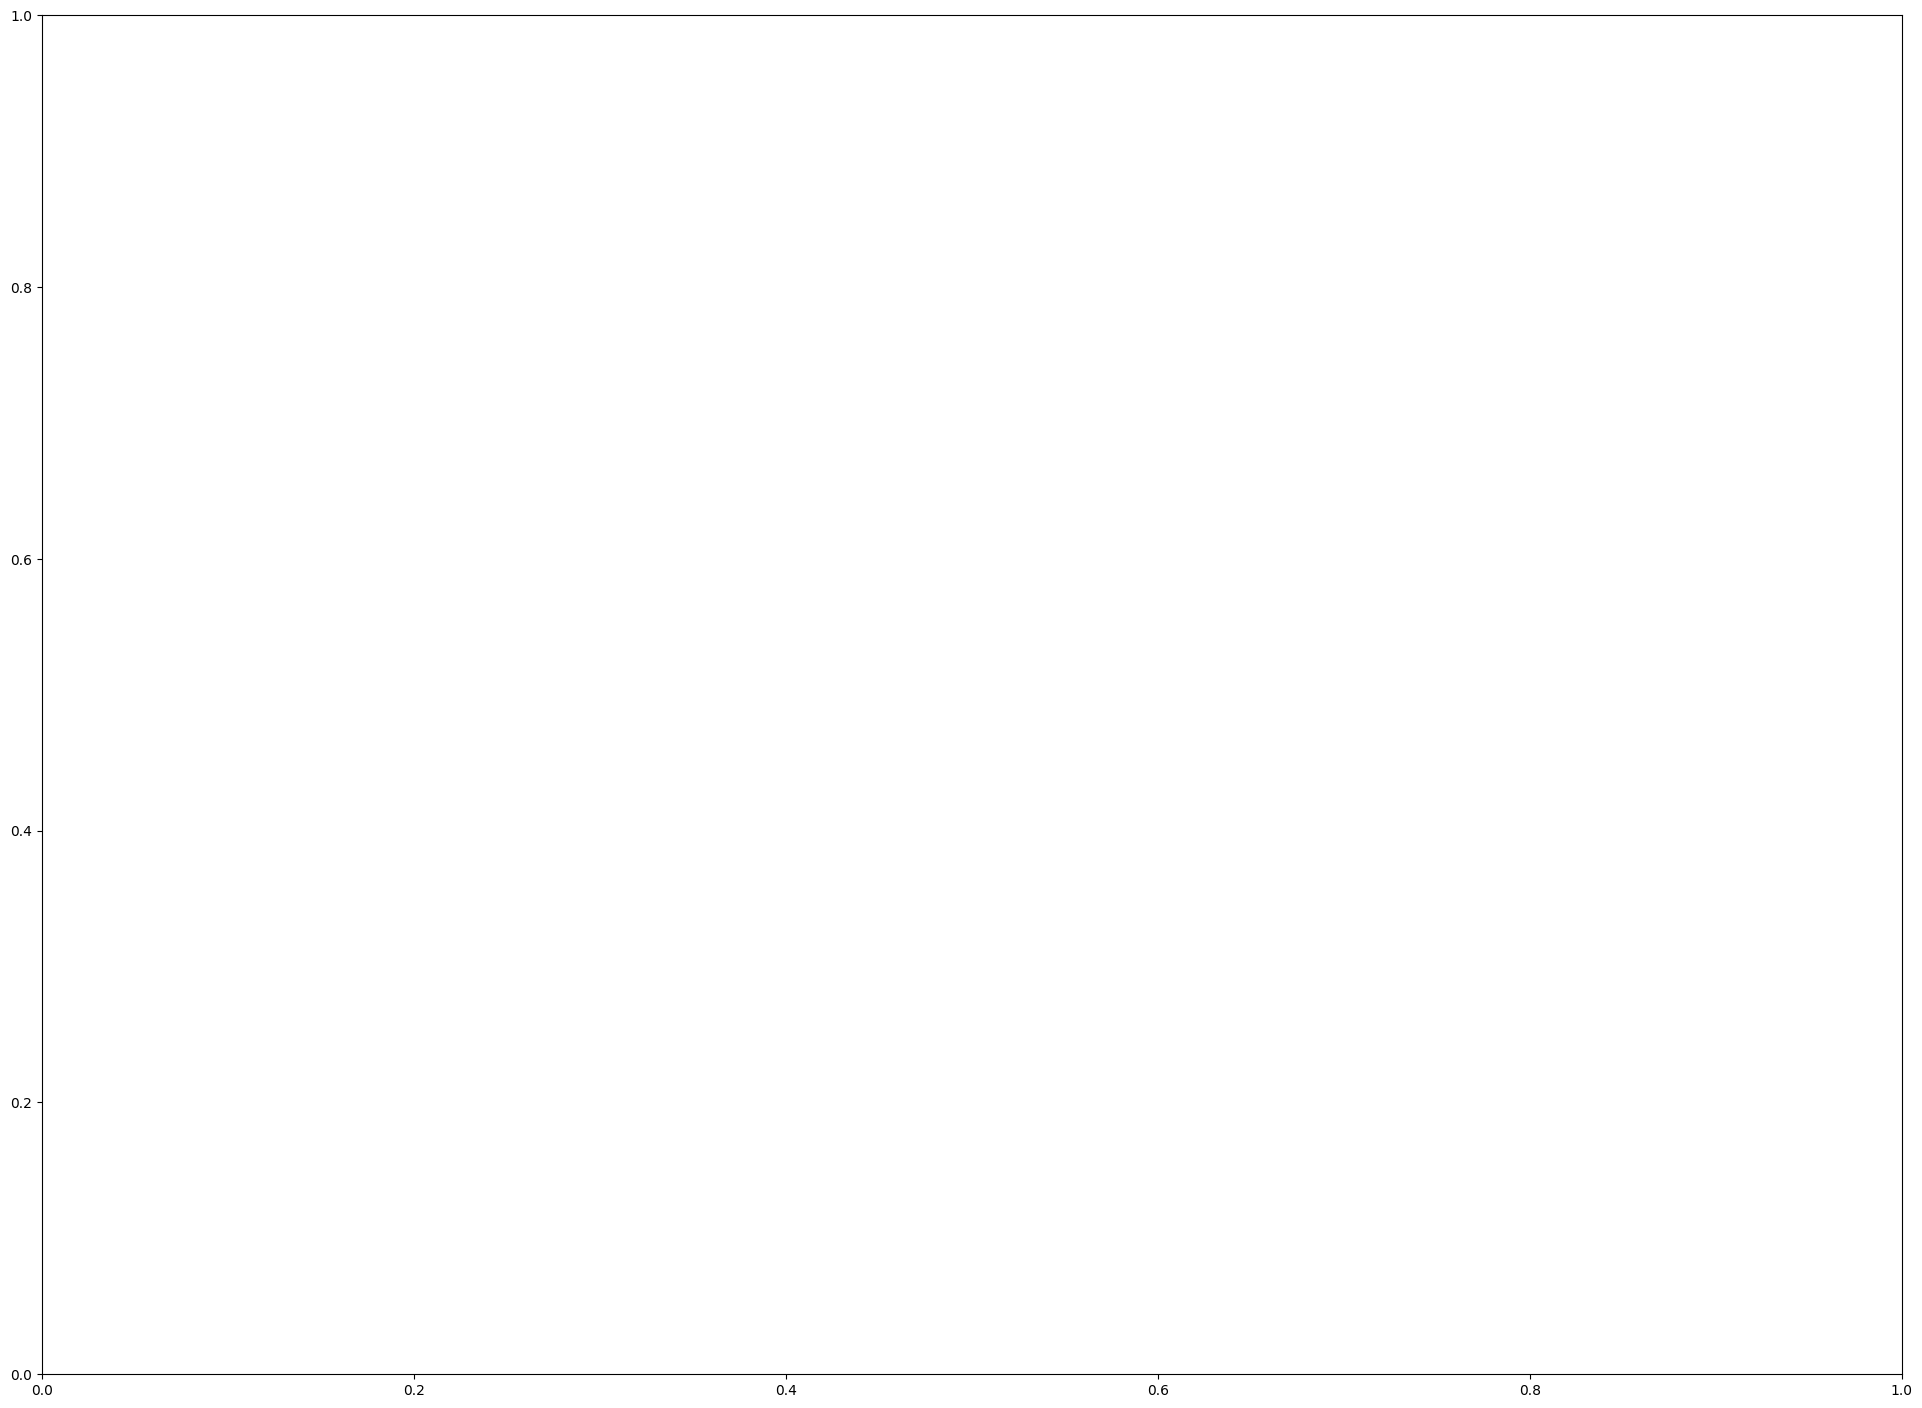

In [93]:
WIDTH = 2048
paths = hilbert_curve(order=11)
print(f'paths = {len(paths)}')

xs=[]
ys=[]

for path in paths:
    xs.append(path.x)
    ys.append(path.y)

#-------------------Plot------------------------
figure=plt.figure(figsize=(24,18),dpi=100)
cmap=plt.cm.jet
ax=figure.add_subplot(111)

path = mpath.Path(np.column_stack([xs, ys]))
#verts = path.interpolated(steps=1).vertices
verts=path.vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(xs))
colorline(x, y, z, ax=ax, cmap=cmap, linewidth=1)

bAdd = False
for i, vert in enumerate(verts):
    x = vert[0]
    y = vert[1]
    
    if i == 0:
        x_old = x
        y_old = y
    
    if x == x_old:
        x1 = x
    if y == y_old:
        y1 = y
    
    if x != x_old:
        if x > x_old:
            x1 = x_old + ((x-x_old)/2)
        else:
            x1 = x + ((x_old-x)/2)
        bAdd = True
        
    if y != y_old:
        if y > y_old:
            y1 = y_old + ((y-y_old)/2)
        else:
            y1 = y + ((y_old-y)/2)
        bAdd = True
        
    plt.text(x, y, str(i), fontsize=12)
    if bAdd:
        plt.text(x1-3, y1-4, 'x', fontsize=12)
    
    x_old = x
    y_old = y

ax.set_ylim(0,WIDTH)
ax.set_xlim(0,WIDTH)

#ax.plot(x,y) # this works, but with blue line
plt.show(block=False)

In [3]:
#verts

## Study 2

paths = 64
nós 163
segmentos 63
per segment 3


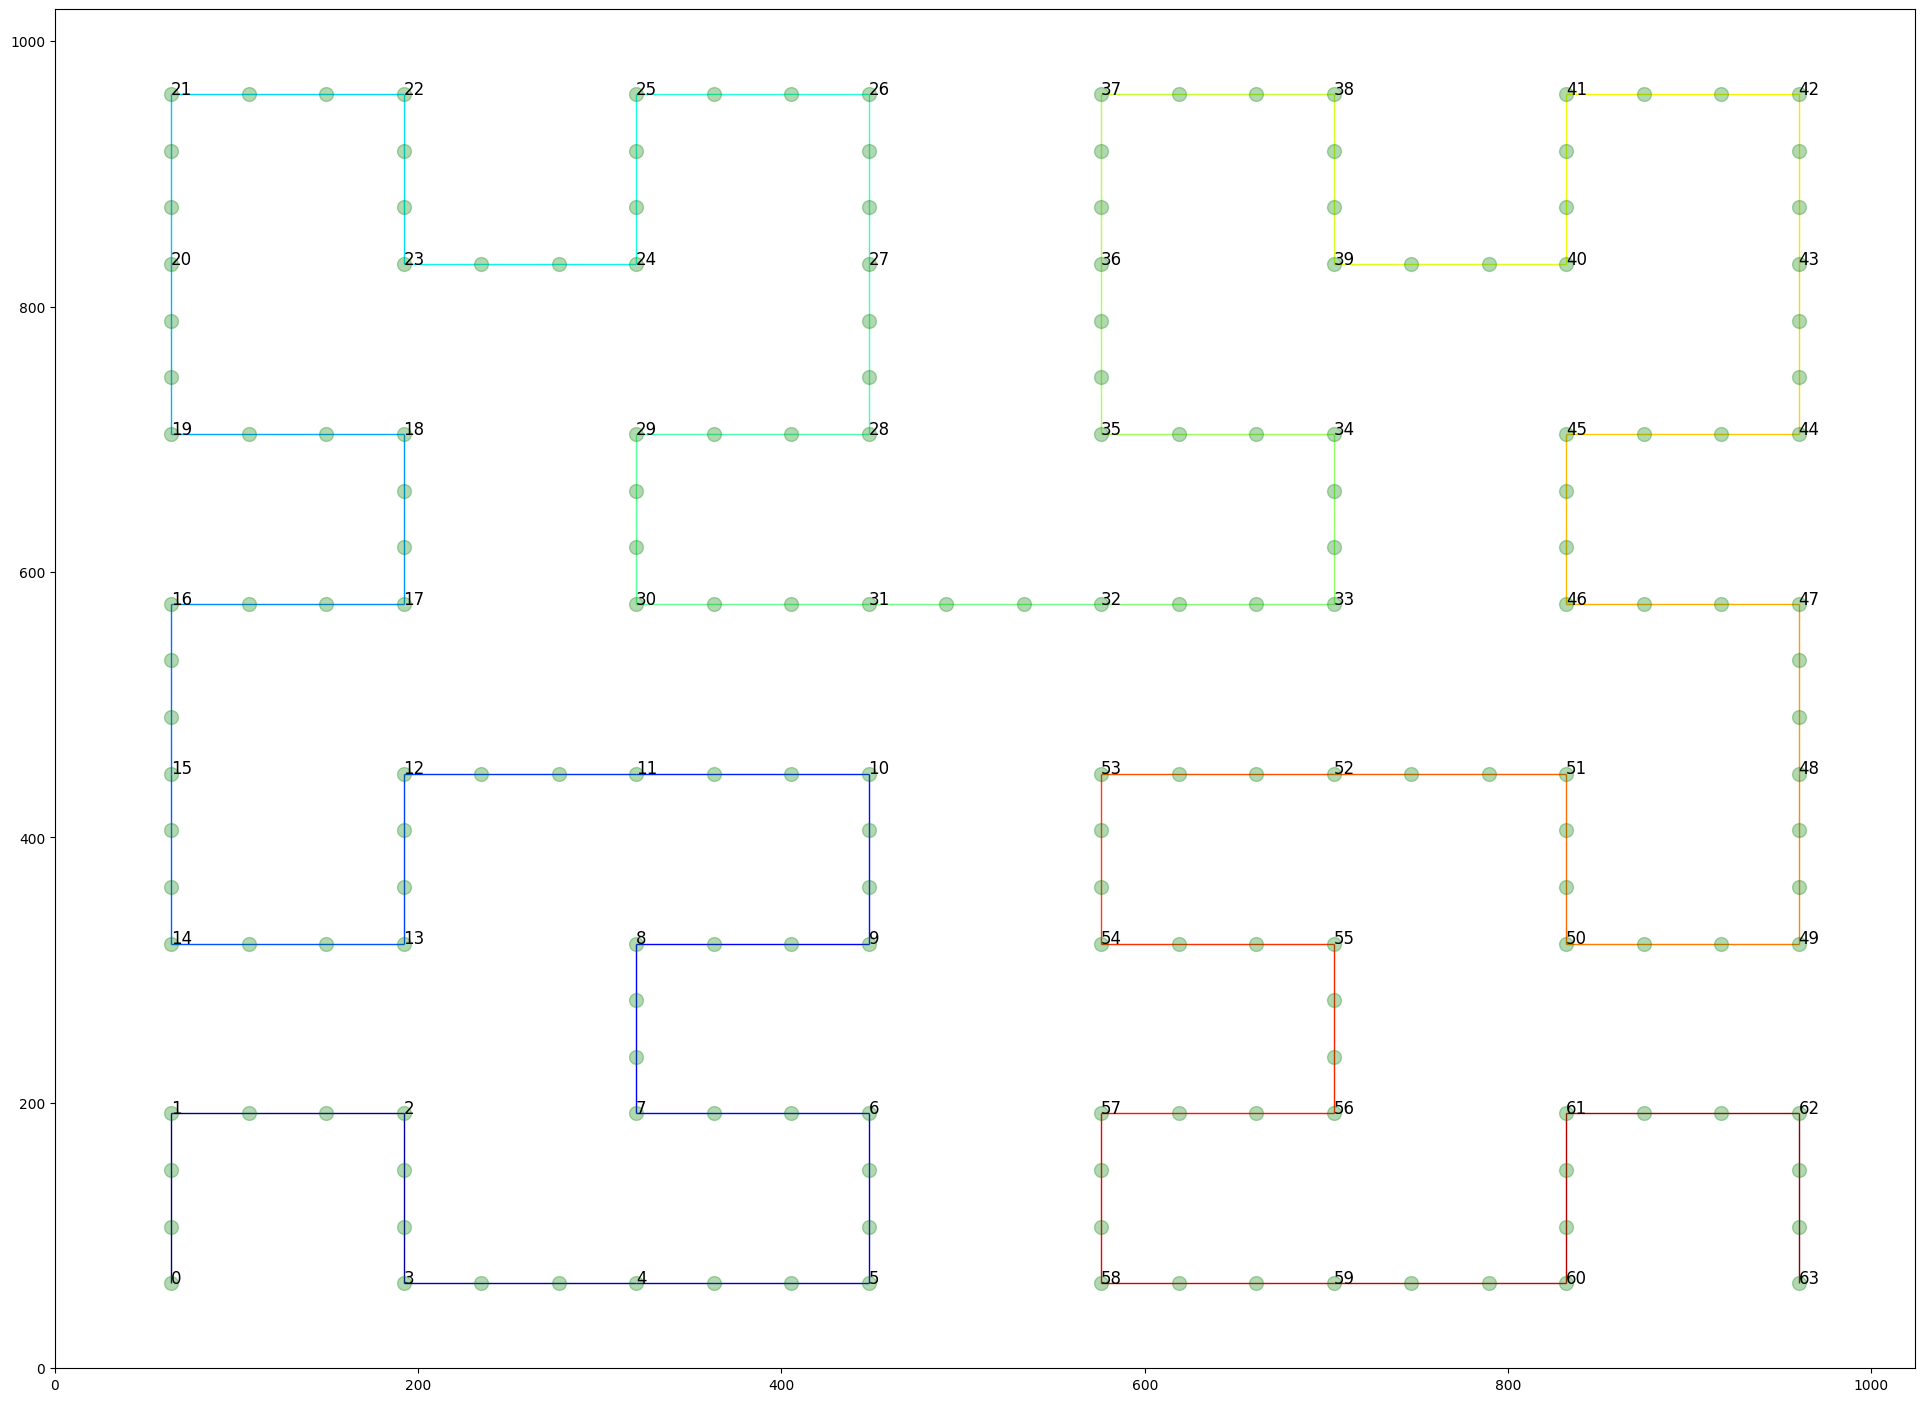

In [154]:
WIDTH = 1024
paths = hilbert_curve(order=3)
print(f'paths = {len(paths)}')

xs=[]
ys=[]

for path in paths:
    xs.append(path.x)
    ys.append(path.y)

#-------------------Plot------------------------
figure=plt.figure(figsize=(24,18),dpi=100)
cmap=plt.cm.jet
ax=figure.add_subplot(111)

path = mpath.Path(np.column_stack([xs, ys]))
#verts = path.interpolated(steps=1).vertices
verts=path.vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(xs))
colorline(x, y, z, ax=ax, cmap=cmap, linewidth=1)

df_data = pd.read_csv('../raw_data/node_ordering.csv', delimiter=';')
per_segment = int(round(data.shape[0] / (len(x)-1), 0))

number_nos = df_data.shape[0]
print(f'nós {number_nos}')
number_segments = (len(x)-1)
print(f'segmentos {number_segments}')
print(f'per segment {per_segment}')

iCount = 0
for i, vert in enumerate(verts):        
    x = vert[0]
    y = vert[1]

    plt.text(x, y, str(i), fontsize=12)
    x_inc = x
    y_inc = y    
    if i > 0:         
        for k in range(1, per_segment):
            if x == x_old:
                if y > y_old:
                    y_inc = y_old + ((y-y_old)/per_segment)*k
                else:
                    y_inc = y_old - ((y_old-y)/per_segment)*k

            if y == y_old:
                if x > x_old:
                    x_inc = x_old + ((x-x_old)/per_segment)*k
                else:
                    x_inc = x_old - ((x_old-x)/per_segment)*k

            plt.plot(x_inc, y_inc, marker='o', markersize=10, color='green', alpha=0.3)
        
    if iCount <= number_nos:  
        plt.plot(x, y, marker='o', markersize=10, color='green', alpha=0.3)
        
    iCount += 1
    
    x_old = x
    y_old = y


ax.set_ylim(0,WIDTH)
ax.set_xlim(0,WIDTH)

#ax.plot(x,y) # this works, but with blue line
plt.show(block=False)

In [147]:
df_data = pd.read_csv('../raw_data/node_ordering.csv', delimiter=';')
df_data

,node,center,node_order,center_order,color
0,7,11,21,1,#b5de2b
1,69,11,22,1,#b5de2b
2,12,11,28,1,#b5de2b
3,201,11,29,1,#b5de2b
4,16,11,30,1,#b5de2b
...,...,...,...,...,...
158,176,27,141,27,#58c765
159,190,12,150,28,#d0e11c
160,203,12,151,28,#d0e11c
161,267,7,161,29,#3a548c


## Study 3

paths = 256
nós 163
segmentos 255
per segment 1
dist_total: 16320.0
dist_between_points: 100.12269938650307


IndexError: index 256 is out of bounds for axis 0 with size 256

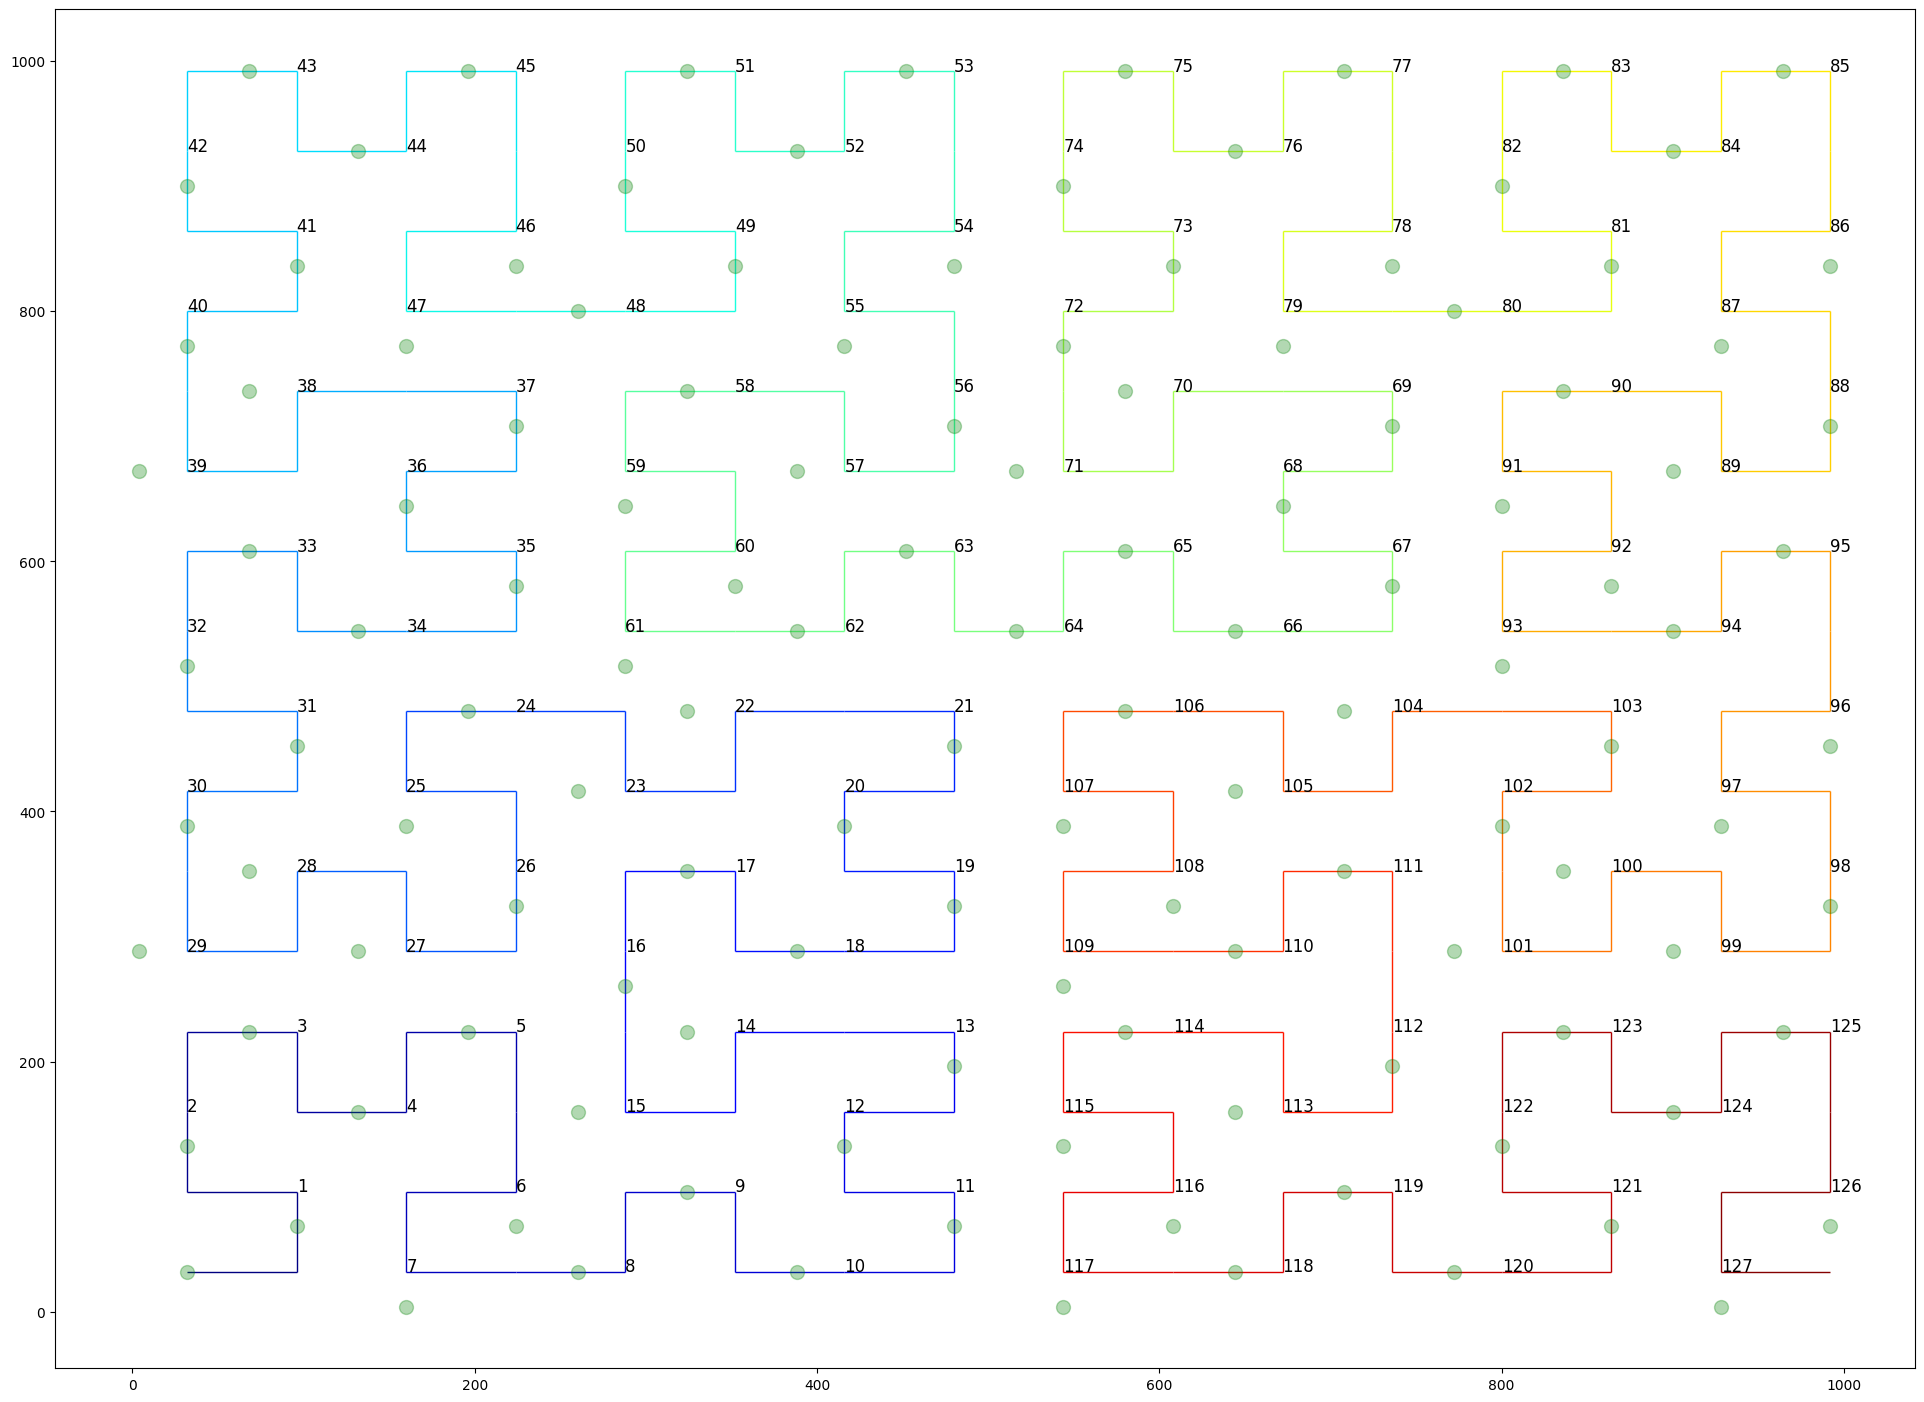

In [197]:
WIDTH = 1024
paths = hilbert_curve(order=4)
print(f'paths = {len(paths)}')

xs=[]
ys=[]

for path in paths:
    xs.append(path.x)
    ys.append(path.y)

#-------------------Plot------------------------
figure=plt.figure(figsize=(24,18),dpi=100)
cmap=plt.cm.jet
ax=figure.add_subplot(111)

path = mpath.Path(np.column_stack([xs, ys]))
#verts = path.interpolated(steps=1).vertices
verts=path.vertices
x, y = verts[:, 0], verts[:, 1]
z = np.linspace(0, 1, len(xs))
colorline(x, y, z, ax=ax, cmap=cmap, linewidth=1)

df_data = pd.read_csv('../raw_data/node_ordering.csv', delimiter=';')
per_segment = int(round(data.shape[0] / (len(x)-1), 0))

number_nos = df_data.shape[0]
print(f'nós {number_nos}')
number_segments = (len(x)-1)
print(f'segmentos {number_segments}')
print(f'per segment {per_segment}')

dist_total = 0
for i, vert in enumerate(verts):        
    x = vert[0]
    y = vert[1]
    if i == 0:
        x_old = x
        y_old = y
    
    if y != y_old:
        dist_total += abs(y-y_old)
    if x != x_old:
        dist_total += abs(x-x_old)
    
    x_old = x
    y_old = y

dist_between_points = dist_total/number_nos
print(f'dist_total: {dist_total}')
print(f'dist_between_points: {dist_between_points}')


ind_vert = 0
x = verts[ind_vert][0]
y = verts[ind_vert][1]
x_old = x
y_old = y    
plt.plot(x, y, marker='o', markersize=10, color='green', alpha=0.3)

dist_total = 0
dist_perc = 0
for k in range(1, number_nos):
    in_x = False
    in_y = False
    while dist_perc <= dist_between_points:       
        x = verts[ind_vert][0]
        y = verts[ind_vert][1]
        
        if y != y_old:
            dist_perc += abs(y-y_old)
            dist_total += abs(y-y_old)
            in_y = True
            in_x = False
        if x != x_old:
            dist_perc += abs(x-x_old)
            dist_total += abs(x-x_old)
            in_x = True
            in_y = False
        x_old = x
        y_old = y
        ind_vert += 1
    
    if in_y:
        diff = dist_perc - dist_between_points
        #print(f'dist_perc: {dist_perc}')
        #print(f'diff y {diff}')
        plt.plot(x, y-diff, marker='o', markersize=10, color='green', alpha=0.3)
        plt.text(x, y, str(k), fontsize=12)
    if in_x:
        diff = dist_perc - dist_between_points
        #print(f'dist_perc: {dist_perc}')
        #print(f'diff x {diff}')
        plt.plot(x-diff, y, marker='o', markersize=10, color='green', alpha=0.3)
        plt.text(x, y, str(k), fontsize=12)
            
    dist_perc = 0
        
print(f'dist_total: {dist_total}')
print(f'ind_vert: {ind_vert}')


ax.set_ylim(0,WIDTH)
ax.set_xlim(0,WIDTH)

#ax.plot(x,y) # this works, but with blue line
plt.show(block=False)